# Recommendation Engine

In [1]:
## import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
file_path = '/content/Bookshop.xlsx'
excel_data = pd.ExcelFile(file_path)

In [3]:
## read the dataset
## read the dataset
df_book=pd.read_excel("Bookshop.xlsx",sheet_name='Book')
df_author=pd.read_excel("Bookshop.xlsx",sheet_name='Author')
df_info=pd.read_excel("Bookshop.xlsx",sheet_name='Info')
df_award=pd.read_excel("Bookshop.xlsx",sheet_name='Award')
df_checkouts=pd.read_excel("Bookshop.xlsx",sheet_name='Checkouts')
df_edition=pd.read_excel("Bookshop.xlsx",sheet_name='Edition')
df_publisher=pd.read_excel("Bookshop.xlsx",sheet_name='Publisher')
df_ratings= pd.read_excel("Bookshop.xlsx",sheet_name='Ratings')
df_series=pd.read_excel("Bookshop.xlsx",sheet_name='Series')
df_salesQ1= pd.read_excel("Bookshop.xlsx",sheet_name='Sales Q1')
df_salesQ2=pd.read_excel("Bookshop.xlsx",sheet_name='Sales Q2')
df_salesQ3= pd.read_excel("Bookshop.xlsx",sheet_name='Sales Q3')
df_salesQ4=pd.read_excel("Bookshop.xlsx",sheet_name='Sales Q4')

In [4]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   BookID  58 non-null     object
 1   Title   58 non-null     object
 2   AuthID  58 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [5]:
df_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AuthID                41 non-null     object        
 1   First Name            41 non-null     object        
 2   Last Name             41 non-null     object        
 3   Birthday              41 non-null     datetime64[ns]
 4   Country of Residence  41 non-null     object        
 5   Hrs Writing per Day   41 non-null     float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 2.0+ KB


In [6]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50330 entries, 0 to 50329
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BookID      50330 non-null  object
 1   Rating      50330 non-null  int64 
 2   ReviewerID  50330 non-null  int64 
 3   ReviewID    50330 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


### In the following steps we will understand the dataset, perform EDA and some visualizations

In [ ]:
df_book

,BookID,Title,AuthID
0,BB194,Ballinby Boys,AM329
1,NC652,Nothing But Capers,AS443
2,AD222,Alanna Saves the Day,BH149
3,PA169,Post Alley,BM856
4,TC188,Thatchwork Cottage,BM856
5,ZT703,Zero over Twelve,BM856
6,PP866,Portmeirion,BT132
7,RR774,Rystwyth,BT132
8,TM925,The Mallemaroking,BT132
9,CH391,Can I Be Honest?,CF829


In [ ]:
df_book.shape

(58, 3)

In [ ]:
df_book.BookID.unique()

array(['BB194', 'NC652', 'AD222', 'PA169', 'TC188', 'ZT703', 'PP866',
       'RR774', 'TM925', 'CH391', 'NL209', 'NR695', 'TH296', 'MM424',
       'TP887', 'LS176', 'AY135', 'IA439', 'KA663', 'BF889', 'NB483',
       'TI225', 'CP573', 'BC244', 'BF374', 'CC830', 'QQ737', 'TH556',
       'SS693', 'TH143', 'AM124', 'TT359', 'DR914', 'TC401', 'BS284',
       'DY800', 'LB510', 'MW621', 'SE355', 'TO369', 'TS869', 'WG715',
       'SS361', 'HS107', 'IG460', 'BR858', 'HP265', 'IC739', 'WK456',
       'NP937', 'WO506', 'DE571', 'ST303', 'ST862', 'TA182', 'TT773',
       'AK974', 'DG384'], dtype=object)

In [ ]:
df_book.Title.unique()

array(['Ballinby Boys', 'Nothing But Capers', 'Alanna Saves the Day',
       'Post Alley', 'Thatchwork Cottage', 'Zero over Twelve',
       'Portmeirion', 'Rystwyth', 'The Mallemaroking', 'Can I Be Honest?',
       'No More Lightning', '9803 North Millworks Road',
       'The Winchcombe Railway Museum Heist', '(im)Mortality',
       'the life and times of an utterly inconsequential person',
       'Land Water Sky Space', 'And I Said Yes', 'Interrobangs for All',
       'Kalakalal Avenue', 'Banana Slug and the Glass Half Full',
       'Not to Gossip, But', 'The Thing Is', 'Concerning Prophecy',
       'Banana Slug and the Lost Cow', 'Banana Slug and Xyr Friends',
       'Cimornul', 'Quiddity and Quoddity',
       'The Startling End of Mr. Hidhoo', 'Say it with Snap!',
       'The Elephant House',
       'A Horrible Human with the Habits of a Monster',
       'Turn Left Til You Get There', 'Dust on the Rim',
       'Tales of the Compass', 'Burnished Silver', 'Did You Hear?',
       'Lace

In [ ]:
df_book.AuthID.unique()

array(['AM329', 'AS443', 'BH149', 'BM856', 'BT132', 'CF829', 'CS190',
       'CW626', 'DB605', 'EH487', 'EK605', 'GG800', 'GH671', 'HB302',
       'JH502', 'JK592', 'JS525', 'KD840', 'KE397', 'KY296', 'LD375',
       'LK915', 'LL585', 'LN356', 'MW974', 'OL640', 'PA878', 'PB147',
       'PH273', 'RL217', 'RP438', 'UK129', 'WH901', 'RM781'], dtype=object)

In [ ]:
## in df_book we have 58 books along with the book ID and 34 author Ids

In [ ]:
df_book.isnull().sum()

BookID    0
Title     0
AuthID    0
dtype: int64

In [ ]:
df_book.duplicated().any()

False

In [ ]:
## we do not have any duplicate rows or null values

In [ ]:
df_author

,AuthID,First Name,Last Name,Birthday,Country of Residence,Hrs Writing per Day
0,AS443,Abraham,Stackhouse,2147-07-01,Norway,6.00
1,AW980,Amelia,"Wangerin, Jr.",2141-03-26,New Zealand,16.00
2,AI923,Anastasia,Inez,2148-03-30,New Zealand,11.00
3,AM329,Arthur,McCrumb,2148-03-13,New Zealand,3.00
4,AH957,Arturo,Hijuelos,2129-01-09,United Kingdom,8.00
5,BH149,Bernard,Hopf,2122-11-27,United States,1.00
6,BT132,Bianca,Thompson,2150-01-28,United States,5.00
7,BL857,Bravig,Lewisohn,2238-01-21,United States,11.00
8,BM856,Burton,Malamud,2145-01-18,Brazil,6.00
9,CS190,Carolyn,Segal,2133-09-24,United States,7.00


In [ ]:
df_author.shape

(41, 6)

In [ ]:
df_author.AuthID.unique()

array(['AS443', 'AW980', 'AI923', 'AM329', 'AH957', 'BH149', 'BT132',
       'BL857', 'BM856', 'CS190', 'CF829', 'CW626', 'DF413', 'DB605',
       'EH487', 'EK605', 'GG800', 'GH671', 'HM751', 'HB302', 'JH502',
       'JS525', 'JK592', 'KY296', 'KD840', 'KE397', 'LL585', 'LN356',
       'LK915', 'LD375', 'MW974', 'OL640', 'PH273', 'PA878', 'PB147',
       'RL217', 'RM781', 'RP438', 'UK129', 'WH901', 'WB149'], dtype=object)

In [ ]:
## here we have 41 unique authors, we will merge this data with df_books using AuthID as common column

In [ ]:
## combine the first name and last name
df_author['Author']=df_author['First Name']+' '+df_author['Last Name']

In [ ]:
## drop the first name and last name
df_author.drop(['First Name','Last Name'],axis=1,inplace=True)

In [ ]:
df_author.isnull().sum()

AuthID                  0
Birthday                0
Country of Residence    0
Hrs Writing per Day     0
Author                  0
dtype: int64

In [ ]:
df_author.duplicated().any()

False

In [ ]:
## AuthID is a common column in df_book and df_author, hence we can merge these two dataframes and irrelevant columns can be dropped
df_book1=df_book.merge(df_author,on='AuthID',how='outer')
df_book1.drop(['Country of Residence','Hrs Writing per Day','Birthday'],axis=1,inplace=True)

In [ ]:
df_book1.shape

(65, 4)

In [ ]:
df_book1.dropna(subset=['Title'],inplace=True)

In [ ]:
df_book1.shape

(58, 4)

In [ ]:
df_info.head()

,BookID1,BookID2,Genre,SeriesID,Volume Number,Staff Comment
0,MM,424,Young Adult,NaN,NaN,Would you want to live forever? Doesn't that d...
1,NR,695,Mystery,IR-ESP,1.0,NaN
2,AM,124,Fiction,NaN,NaN,"""This graphic novel is better than years of ma..."
3,AK,974,Young Adult,NaN,NaN,NaN
4,AD,222,Childrens,NaN,NaN,Alanna didn't expect this Tuesday to be any di...


In [ ]:
## we can join BookID1 and BookID2 to get the BookID and then drop BookID1 and BookID2
df_info['BookID']=df_info['BookID1']+df_info['BookID2'].astype(str)
df_info.drop(['BookID1','BookID2'],axis=1,inplace=True)

In [ ]:
df_info.shape

(58, 5)

In [ ]:
df_info.isnull().sum()

Genre             0
SeriesID         38
Volume Number    38
Staff Comment    26
BookID            0
dtype: int64

In [ ]:
df_info.duplicated().any()

False

In [ ]:
## we need only genre from this dataset and the remaining columns can be dropped hence we merge this with df_book1 using BookID
df_book2=df_book1.merge(df_info,on='BookID',how='outer')
df_book2.drop(['SeriesID','Volume Number','Staff Comment'],axis=1,inplace=True)

In [ ]:
df_book2.shape

(58, 5)

In [ ]:
df_award.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Title       18 non-null     object
 1   Award Name  18 non-null     object
 2   Year Won    18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 564.0+ bytes


In [ ]:
df_award['Title'].value_counts()

Title
The Mallemaroking                                          2
Post Alley                                                 1
Heliotrope Pajamas                                         1
Ballinby Boys                                              1
Saint Esme                                                 1
Hashtag QuokkaSelfie                                       1
We're Sisters and We Kinda Like Each Other                 1
Inconvenient Confessions: a memoir                         1
the life and times of an utterly inconsequential person    1
The Spark and The Ashes                                    1
Alanna Saves the Day                                       1
Cimornul                                                   1
Nothing But Capers                                         1
No More Lightning                                          1
Rystwyth                                                   1
Portmeirion                                                1
(im)Mortality     

In [ ]:
print(df_award[df_award['Title'].str.contains('The Mallemaroking')])

               Title    Award Name  Year Won
4  The Mallemaroking    Hugo Award      2179
9  The Mallemaroking  Nebula Award      2179


In [ ]:
df_award[df_award['Title'].str.contains('The Mallemaroking')]

,Title,Award Name,Year Won
4,The Mallemaroking,Hugo Award,2179
9,The Mallemaroking,Nebula Award,2179


In [ ]:
df_award.at[4,'Award Name']='Hugo Award & Nebula Award'

In [ ]:
df_award[df_award['Title'].str.contains('The Mallemaroking')]

,Title,Award Name,Year Won
4,The Mallemaroking,Hugo Award & Nebula Award,2179
9,The Mallemaroking,Nebula Award,2179


In [ ]:
df_award1=df_award.drop([9,])
df_award1.reset_index(inplace=True)

In [ ]:
df_award1

,index,Title,Award Name,Year Won
0,0,Post Alley,Agatha Award,2179
1,1,Alanna Saves the Day,Caldecott Medal,2186
2,2,Portmeirion,Hugo Award,2188
3,3,Rystwyth,Hugo Award,2193
4,4,The Mallemaroking,Hugo Award & Nebula Award,2179
5,5,No More Lightning,Man Booker,2191
6,6,Nothing But Capers,National Book Award,2179
7,7,Cimornul,National Book Award,2189
8,8,The Spark and The Ashes,National Book Award,2193
9,10,Heliotrope Pajamas,Newberry Medal,2182


In [ ]:
df_award1.drop(['index','Year Won'],axis=1,inplace=True)

In [ ]:
## now we will merge Award Name with df_book2 on the basis of Title
df_book3=df_book2.merge(df_award1,on='Title',how='outer')

In [ ]:
df_book3.shape

(58, 6)

In [ ]:
df_book3.head()

,BookID,Title,AuthID,Author,Genre,Award Name
0,MM424,(im)Mortality,CW626,Clifford Wolitzer,Young Adult,Young Reader's Choice Award
1,NR695,9803 North Millworks Road,CS190,Carolyn Segal,Mystery,NaN
2,AM124,A Horrible Human with the Habits of a Monster,KD840,Kenneth Douglas,Fiction,NaN
3,AK974,Adventures of Kaya,WH901,Ward Haigh,Young Adult,NaN
4,AD222,Alanna Saves the Day,BH149,Bernard Hopf,Childrens,Caldecott Medal


In [ ]:
df_book3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   BookID      58 non-null     object
 1   Title       58 non-null     object
 2   AuthID      58 non-null     object
 3   Author      58 non-null     object
 4   Genre       58 non-null     object
 5   Award Name  17 non-null     object
dtypes: object(6)
memory usage: 2.8+ KB


In [ ]:
## we have some null values in Award Name, we will replace them with No Award
df_book3.fillna('No Award',inplace=True)

In [ ]:
df_checkouts.head()

,BookID,CheckoutMonth,Number of Checkouts
0,AD222,1,40
1,AD222,3,39
2,AD222,11,34
3,AD222,4,33
4,AD222,5,33


In [ ]:
df_checkouts.shape

(668, 3)

In [ ]:
df_checkouts['BookID'].unique()

array(['AD222', 'AK974', 'AM124', 'AY135', 'BB194', 'BC244', 'BF374',
       'BF889', 'BR858', 'BS284', 'CH391', 'CH392', 'CP573', 'DE571',
       'DR914', 'HP265', 'HS107', 'IA439', 'IG460', 'IC739', 'KA663',
       'LB510', 'LS176', 'MM424', 'MW621', 'NC652', 'NL209', 'NP937',
       'NR695', 'TC401', 'WK456', 'NB483', 'DY800', 'PA169', 'TH556',
       'PP866', 'QQ737', 'RR774', 'SE355', 'SS361', 'SS693', 'ST303',
       'ST862', 'TA182', 'TC188', 'TH143', 'TH296', 'TI225', 'TM925',
       'TO369', 'TP887', 'TS869', 'TT359', 'TT773', 'WG715', 'WO506',
       'ZT703'], dtype=object)

In [ ]:
## since we have multiple rows for BookID, we will use goupby to get the total checkouts in a year
df_checkouts1=df_checkouts.groupby('BookID')[['CheckoutMonth','Number of Checkouts']].sum()
df_checkouts1.reset_index(inplace=True)
df_checkouts1.drop('CheckoutMonth',axis=1,inplace=True)
df_checkouts1.head()

,BookID,Number of Checkouts
0,AD222,384
1,AK974,464
2,AM124,65
3,AY135,93
4,BB194,328


In [ ]:
df_checkouts1.shape

(57, 2)

In [ ]:
## we will merge this with df_book3
df_book4=df_book3.merge(df_checkouts1,on='BookID',how='outer')
df_book4

,BookID,Title,AuthID,Author,Genre,Award Name,Number of Checkouts
0,AD222,Alanna Saves the Day,BH149,Bernard Hopf,Childrens,Caldecott Medal,384.0
1,AK974,Adventures of Kaya,WH901,Ward Haigh,Young Adult,No Award,464.0
2,AM124,A Horrible Human with the Habits of a Monster,KD840,Kenneth Douglas,Fiction,No Award,65.0
3,AY135,And I Said Yes,EK605,Elmer Komroff,Fiction,No Award,93.0
4,BB194,Ballinby Boys,AM329,Arthur McCrumb,SciFi/Fantasy,World Fantasy Award,328.0
5,BC244,Banana Slug and the Lost Cow,HB302,Hillary Barnhardt,Childrens,No Award,218.0
6,BF374,Banana Slug and Xyr Friends,HB302,Hillary Barnhardt,Childrens,No Award,247.0
7,BF889,Banana Slug and the Glass Half Full,GG800,Gloria Green,Childrens,No Award,151.0
8,BR858,Banana Slug and the Mossy Rock,MW974,Malin Wolff,Childrens,No Award,109.0
9,BS284,Burnished Silver,LD375,Lynne Danticat,Romance,No Award,219.0


In [ ]:
## we will replace the null values in checkouts with 0 and rename the column
df_book4.dropna(subset=['Title'],inplace=True)
df_book4.fillna(0,inplace=True)
df_book4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 0 to 58
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BookID               58 non-null     object 
 1   Title                58 non-null     object 
 2   AuthID               58 non-null     object 
 3   Author               58 non-null     object 
 4   Genre                58 non-null     object 
 5   Award Name           58 non-null     object 
 6   Number of Checkouts  58 non-null     float64
dtypes: float64(1), object(6)
memory usage: 3.6+ KB


In [ ]:
df_edition.head()

,ISBN,BookID,Format,PubID,Publication Date,Pages,Print Run Size (k),Price
0,989-28-79-70597-8,TT359,Hardcover,ESP,2178-06-02,277,15,27.99
1,989-28-654-6930-3,NP937,Hardcover,PP,2178-08-18,394,6,30.99
2,989-28-79-52883-6,PA169,Hardcover,PP,2178-09-08,384,10,27.99
3,989-28-79-43574-5,TM925,Graphic,ESP,2178-09-15,187,8,23.99
4,989-28-654-5794-2,HS107,Hardcover,PP,2178-09-29,640,3,26.99


In [ ]:
df_edition.shape

(95, 8)

In [ ]:
df_edition.BookID.unique()

array(['TT359', 'NP937', 'PA169', 'TM925', 'HS107', 'DR914', 'AY135',
       'BB194', 'TI225', 'SS361', 'NC652', 'HP265', 'NR695', 'NB483',
       'TS869', 'MW621', 'AK974', 'IA439', 'WO506', 'TH556', 'WG715',
       'DY800', 'QQ737', 'DE571', 'TH143', 'TH296', 'TO369', 'IG460',
       'AD222', 'TC188', 'LB510', 'BF889', 'ZT703', 'PP866', 'CH391',
       'BC244', 'KA663', 'BR858', 'TT773', 'CC830', 'SE355', 'BF374',
       'ST303', 'AM124', 'IC739', 'ST862', 'CP573', 'NL209', 'TC401',
       'SS693', 'LS176', 'TP887', 'BS284', 'MM424', 'RR774', 'TA182',
       'WK456'], dtype=object)

In [ ]:
df_edition1=df_edition.drop(['Format','Publication Date','Print Run Size (k)'],axis=1)

In [ ]:
## merge this with df_book4 on the basis of BookID
df_book5=df_book4.merge(df_edition1,on='BookID',how='outer')
df_book5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BookID               96 non-null     object 
 1   Title                96 non-null     object 
 2   AuthID               96 non-null     object 
 3   Author               96 non-null     object 
 4   Genre                96 non-null     object 
 5   Award Name           96 non-null     object 
 6   Number of Checkouts  96 non-null     float64
 7   ISBN                 95 non-null     object 
 8   PubID                95 non-null     object 
 9   Pages                95 non-null     float64
 10  Price                95 non-null     float64
dtypes: float64(3), object(8)
memory usage: 8.4+ KB


In [ ]:
df_book5[df_book5['ISBN'].isnull()]

,BookID,Title,AuthID,Author,Genre,Award Name,Number of Checkouts,ISBN,PubID,Pages,Price
23,DG384,The Deep Grey,RM781,Robert Milofsky,Fiction,No Award,0.0,NaN,NaN,NaN,NaN


In [ ]:
df_publisher

,PubID,Publishing House,City,State,Country,Year Established,Marketing Spend
0,CHP,Cedar House Publishers,Friday Harbor,Washington,USA,2086,72000
1,SSC,Sound & Seas Co.,Dunedin,Otago,New Zealand,2153,151000
2,PP,Palimpsest Printing,Edinburgh,Scotland,UK,1982,48000
3,ESP,Etaoin Shrdlu Press,Seattle,Washington,USA,2069,2320000


In [ ]:
df_publisher1=df_publisher.drop(['City','State','Country','Year Established','Marketing Spend'],axis=1)

In [ ]:
## we will add the publising house to our dataframe
## merge this with df_book5 on the basis of PubID
df_book6=df_book5.merge(df_publisher1,on='PubID',how='outer')
df_book6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BookID               96 non-null     object 
 1   Title                96 non-null     object 
 2   AuthID               96 non-null     object 
 3   Author               96 non-null     object 
 4   Genre                96 non-null     object 
 5   Award Name           96 non-null     object 
 6   Number of Checkouts  96 non-null     float64
 7   ISBN                 95 non-null     object 
 8   PubID                95 non-null     object 
 9   Pages                95 non-null     float64
 10  Price                95 non-null     float64
 11  Publishing House     95 non-null     object 
dtypes: float64(3), object(9)
memory usage: 9.1+ KB


In [ ]:
df_book6[df_book6['Publishing House'].isnull()]

,BookID,Title,AuthID,Author,Genre,Award Name,Number of Checkouts,ISBN,PubID,Pages,Price,Publishing House
95,DG384,The Deep Grey,RM781,Robert Milofsky,Fiction,No Award,0.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ratings

,BookID,Rating,ReviewerID,ReviewID
0,AD222,5,105,3372
1,AD222,3,113,7340
2,AD222,3,234,20430
3,AD222,4,459,40653
4,AD222,2,550,51337
...,...,...,...,...
50325,ZT703,2,53119,5308138
50326,ZT703,5,53141,5310932
50327,ZT703,3,53176,5312650
50328,ZT703,4,53354,5327579


In [ ]:
df_ratings.BookID.unique()

array(['AD222', 'AK974', 'AM124', 'AY135', 'BB194', 'BC244', 'BF374',
       'BF889', 'BR858', 'BS284', 'CH391', 'CH392', 'CP573', 'DE571',
       'DR914', 'DY800', 'HP265', 'HS107', 'IA439', 'IC739', 'IG460',
       'KA663', 'LB510', 'LS176', 'MM424', 'MW621', 'NB483', 'NC652',
       'NL209', 'NP937', 'NR695', 'PA169', 'PP866', 'QQ737', 'RR774',
       'SE355', 'SS361', 'SS693', 'ST303', 'ST862', 'TA182', 'TC188',
       'TC401', 'TH143', 'TH296', 'TH556', 'TI225', 'TM925', 'TO369',
       'TP887', 'TS869', 'TT359', 'TT773', 'WG715', 'WK456', 'WO506',
       'ZT703'], dtype=object)

In [ ]:
## we will find the average ratings and add it as average ratings column and drop Review ID
df_ratings.drop('ReviewID',axis=1,inplace=True)

In [ ]:
df_book7=df_book6.merge(df_ratings,on='BookID',how='outer')

In [ ]:
df_ratings1=df_ratings.groupby('BookID')[['Rating']].mean()
df_ratings1.reset_index(inplace=True)
df_ratings1

,BookID,Rating
0,AD222,4.018008
1,AK974,4.421885
2,AM124,3.714754
3,AY135,3.860825
4,BB194,3.740396
5,BC244,4.005911
6,BF374,4.094183
7,BF889,4.338724
8,BR858,4.030899
9,BS284,4.138261


In [ ]:
df_book8=df_book7.merge(df_ratings1,on='BookID',how='outer')

In [ ]:
df_book8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85449 entries, 0 to 85448
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BookID               85449 non-null  object 
 1   Title                84901 non-null  object 
 2   AuthID               84901 non-null  object 
 3   Author               84901 non-null  object 
 4   Genre                84901 non-null  object 
 5   Award Name           84901 non-null  object 
 6   Number of Checkouts  84901 non-null  float64
 7   ISBN                 84900 non-null  object 
 8   PubID                84900 non-null  object 
 9   Pages                84900 non-null  float64
 10  Price                84900 non-null  float64
 11  Publishing House     84900 non-null  object 
 12  Rating_x             85446 non-null  float64
 13  ReviewerID           85446 non-null  float64
 14  Rating_y             85446 non-null  float64
dtypes: float64(6), object(9)
memory usag

In [ ]:
df_book8.rename(columns={'Rating_x':'Rating','Rating_y':'Average Rating'},inplace=True)
df_book8

,BookID,Title,AuthID,Author,Genre,Award Name,Number of Checkouts,ISBN,PubID,Pages,Price,Publishing House,Rating,ReviewerID,Average Rating
0,AD222,Alanna Saves the Day,BH149,Bernard Hopf,Childrens,Caldecott Medal,384.0,989-28-3705-987-7,CHP,188.0,8.99,Cedar House Publishers,5.0,105.0,4.018008
1,AD222,Alanna Saves the Day,BH149,Bernard Hopf,Childrens,Caldecott Medal,384.0,989-28-3705-987-7,CHP,188.0,8.99,Cedar House Publishers,3.0,113.0,4.018008
2,AD222,Alanna Saves the Day,BH149,Bernard Hopf,Childrens,Caldecott Medal,384.0,989-28-3705-987-7,CHP,188.0,8.99,Cedar House Publishers,3.0,234.0,4.018008
3,AD222,Alanna Saves the Day,BH149,Bernard Hopf,Childrens,Caldecott Medal,384.0,989-28-3705-987-7,CHP,188.0,8.99,Cedar House Publishers,4.0,459.0,4.018008
4,AD222,Alanna Saves the Day,BH149,Bernard Hopf,Childrens,Caldecott Medal,384.0,989-28-3705-987-7,CHP,188.0,8.99,Cedar House Publishers,2.0,550.0,4.018008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85444,ZT703,Zero over Twelve,BM856,Burton Malamud,Mystery,No Award,576.0,989-28-79-05670-4,ESP,338.0,8.99,Etaoin Shrdlu Press,2.0,53119.0,3.986920
85445,ZT703,Zero over Twelve,BM856,Burton Malamud,Mystery,No Award,576.0,989-28-79-05670-4,ESP,338.0,8.99,Etaoin Shrdlu Press,5.0,53141.0,3.986920
85446,ZT703,Zero over Twelve,BM856,Burton Malamud,Mystery,No Award,576.0,989-28-79-05670-4,ESP,338.0,8.99,Etaoin Shrdlu Press,3.0,53176.0,3.986920
85447,ZT703,Zero over Twelve,BM856,Burton Malamud,Mystery,No Award,576.0,989-28-79-05670-4,ESP,338.0,8.99,Etaoin Shrdlu Press,4.0,53354.0,3.986920


In [ ]:
df_book8.dropna(subset=['Title'],inplace=True)

In [ ]:
df_series

,SeriesID,Series Name,Planned Volumes,Book Tour Events
0,BS-CHP,Banana Slug,5,24
1,MT-ESP,Meddler Trilogy,3,17
2,EL-SSC,Esme's Ladies,7,15
3,MM-ESP,The Mallemaroking Saga,3,32
4,IR-ESP,Inspector Ryeslton,4,19
5,AT-ESP,The Aspall Trilogy,3,5


In [ ]:
## since we have dropped seriesID, this data is irrelevant hence we can ignore this

In [ ]:
print(df_salesQ1.head())
print(df_salesQ2.head())
print(df_salesQ3.head())
print(df_salesQ4.head())

   Sale Date               ISBN  Discount          ItemID    OrderID
0 2193-01-02  989-28-3705-007-2       NaN  107020-91-8011   107020-1
1 2193-01-02  989-28-79-11297-4       NaN   107020-9-3293  107020-10
2 2193-01-02  989-28-79-11297-4       NaN  107020-91-4622  107020-11
3 2193-01-02  989-28-79-18127-7       NaN  107020-38-4663  107020-12
4 2193-01-02  989-28-79-82197-5      0.15   107020-1-1485  107020-13
   Sale Date               ISBN  Discount          ItemID      OrderID
0 2193-04-01  989-28-79-69807-2      0.15   107109-1-3249  107085-6872
1 2193-04-01  989-28-79-69807-2      0.15   107109-1-3248  107085-6943
2 2193-04-01  989-28-3705-007-2       NaN  107109-17-3177  107109-6844
3 2193-04-01  989-28-3705-054-6       NaN  107109-44-5486  107109-6845
4 2193-04-01  989-28-3705-007-2       NaN  107109-50-8483  107109-6846
   Sale Date               ISBN  Discount          ItemID       OrderID
0 2193-07-01  989-28-79-68089-3      0.15   107200-1-6303  107178-18776
1 2193-07-01  98

In [ ]:
## in the sales data for all the quarters we see that only discount is relevant

In [ ]:
df_salesQ1.fillna(0,inplace=True)
df_salesQ1_1=df_salesQ1.drop(['Sale Date','ItemID','OrderID'],axis=1)
df_salesQ1_2=df_salesQ1_1.groupby('ISBN')['Discount'].sum()
df_salesQ1_3=df_salesQ1_2.reset_index()
df_salesQ1_3

,ISBN,Discount
0,989-28-229-0197-6,0.13
1,989-28-229-1404-4,6.43
2,989-28-229-3157-7,0.00
3,989-28-229-5891-8,0.39
4,989-28-229-6632-6,18.40
...,...,...
88,989-28-79-82339-9,0.00
89,989-28-79-82749-6,0.26
90,989-28-79-86624-2,0.00
91,989-28-79-87459-9,0.00


In [ ]:
## performimg the same steps for Q2, Q3 and Q4
df_salesQ2.fillna(0,inplace=True)
df_salesQ2_1=df_salesQ2.drop(['Sale Date','ItemID','OrderID'],axis=1)
df_salesQ2_2=df_salesQ2_1.groupby('ISBN')['Discount'].sum()
df_salesQ2_3=df_salesQ2_2.reset_index()
df_salesQ3.fillna(0,inplace=True)
df_salesQ3_1=df_salesQ3.drop(['Sale Date','ItemID','OrderID'],axis=1)
df_salesQ3_2=df_salesQ3_1.groupby('ISBN')['Discount'].sum()
df_salesQ3_3=df_salesQ3_2.reset_index()
df_salesQ4.fillna(0,inplace=True)
df_salesQ4_1=df_salesQ4.drop(['Sale Date','ItemID','OrderID'],axis=1)
df_salesQ4_2=df_salesQ4_1.groupby('ISBN')['Discount'].sum()
df_salesQ4_3=df_salesQ4_2.reset_index()

In [ ]:
## concatinate all the _3 data
sale_data=pd.concat([df_salesQ1_3,df_salesQ2_3,df_salesQ3_3,df_salesQ4_3],ignore_index=True)

In [ ]:
## final discount dataset
sale_data1=sale_data.groupby('ISBN')['Discount'].sum()
df_sales=sale_data1.reset_index()
df_sales

,ISBN,Discount
0,989-28-229-0197-6,12.09
1,989-28-229-1404-4,8.06
2,989-28-229-3157-7,13.16
3,989-28-229-5891-8,25.25
4,989-28-229-6632-6,20.29
...,...,...
88,989-28-79-82339-9,0.00
89,989-28-79-82749-6,1.30
90,989-28-79-86624-2,0.65
91,989-28-79-87459-9,5.85


In [ ]:
## merge this with df_book7 on the basis of ISBN
df=df_book8.merge(df_sales,on='ISBN',how='outer')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84901 entries, 0 to 84900
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   BookID               84901 non-null  object 
 1   Title                84901 non-null  object 
 2   AuthID               84901 non-null  object 
 3   Author               84901 non-null  object 
 4   Genre                84901 non-null  object 
 5   Award Name           84901 non-null  object 
 6   Number of Checkouts  84901 non-null  float64
 7   ISBN                 84900 non-null  object 
 8   PubID                84900 non-null  object 
 9   Pages                84900 non-null  float64
 10  Price                84900 non-null  float64
 11  Publishing House     84900 non-null  object 
 12  Rating               84898 non-null  float64
 13  ReviewerID           84898 non-null  float64
 14  Average Rating       84898 non-null  float64
 15  Discount             84898 non-null 

In [ ]:
df[df['ReviewerID'].isnull()]

,BookID,Title,AuthID,Author,Genre,Award Name,Number of Checkouts,ISBN,PubID,Pages,Price,Publishing House,Rating,ReviewerID,Average Rating,Discount
68477,CC830,Cimornul,JH502,Jill Hergesheimer,SciFi/Fantasy,National Book Award,0.0,989-28-79-56856-6,ESP,434.0,21.50,Etaoin Shrdlu Press,NaN,NaN,NaN,NaN
84899,CC830,Cimornul,JH502,Jill Hergesheimer,SciFi/Fantasy,National Book Award,0.0,989-28-79-96705-5,ESP,381.0,8.99,Etaoin Shrdlu Press,NaN,NaN,NaN,NaN
84900,DG384,The Deep Grey,RM781,Robert Milofsky,Fiction,No Award,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## remove the null values
df.dropna(subset=['ReviewerID'],inplace=True)
df.isnull().sum()

BookID                 0
Title                  0
AuthID                 0
Author                 0
Genre                  0
Award Name             0
Number of Checkouts    0
ISBN                   0
PubID                  0
Pages                  0
Price                  0
Publishing House       0
Rating                 0
ReviewerID             0
Average Rating         0
Discount               0
dtype: int64

In [ ]:
df.duplicated().any()

False

In [ ]:
## in this dataset irrelevant columns are BookID, AuthID, PubID hence we will drop them
df.drop(['BookID','AuthID','PubID'],axis=1,inplace=True)
df.rename(columns={'Number of Checkouts':'Checkouts','Title':'Book'},inplace=True)

In [ ]:
## out final dataset is ready
df

,Book,Author,Genre,Award Name,Checkouts,ISBN,Pages,Price,Publishing House,Rating,ReviewerID,Average Rating,Discount
0,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,2.0,35.0,4.166113,12.09
1,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,3.0,75.0,4.166113,12.09
2,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,5.0,130.0,4.166113,12.09
3,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,4.0,166.0,4.166113,12.09
4,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,3.0,203.0,4.166113,12.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84894,The Mallemaroking,Bianca Thompson,SciFi/Fantasy,Hugo Award & Nebula Award,1243.0,989-28-79-91028-0,784.0,12.5,Etaoin Shrdlu Press,5.0,53263.0,4.659653,1.04
84895,The Mallemaroking,Bianca Thompson,SciFi/Fantasy,Hugo Award & Nebula Award,1243.0,989-28-79-91028-0,784.0,12.5,Etaoin Shrdlu Press,4.0,53264.0,4.659653,1.04
84896,The Mallemaroking,Bianca Thompson,SciFi/Fantasy,Hugo Award & Nebula Award,1243.0,989-28-79-91028-0,784.0,12.5,Etaoin Shrdlu Press,5.0,53287.0,4.659653,1.04
84897,The Mallemaroking,Bianca Thompson,SciFi/Fantasy,Hugo Award & Nebula Award,1243.0,989-28-79-91028-0,784.0,12.5,Etaoin Shrdlu Press,4.0,53383.0,4.659653,1.04


In [ ]:
## take a copy of this dataset
df_copy=df.copy()

In [ ]:
## visualization for categorical columns

<Axes: ylabel='Book'>

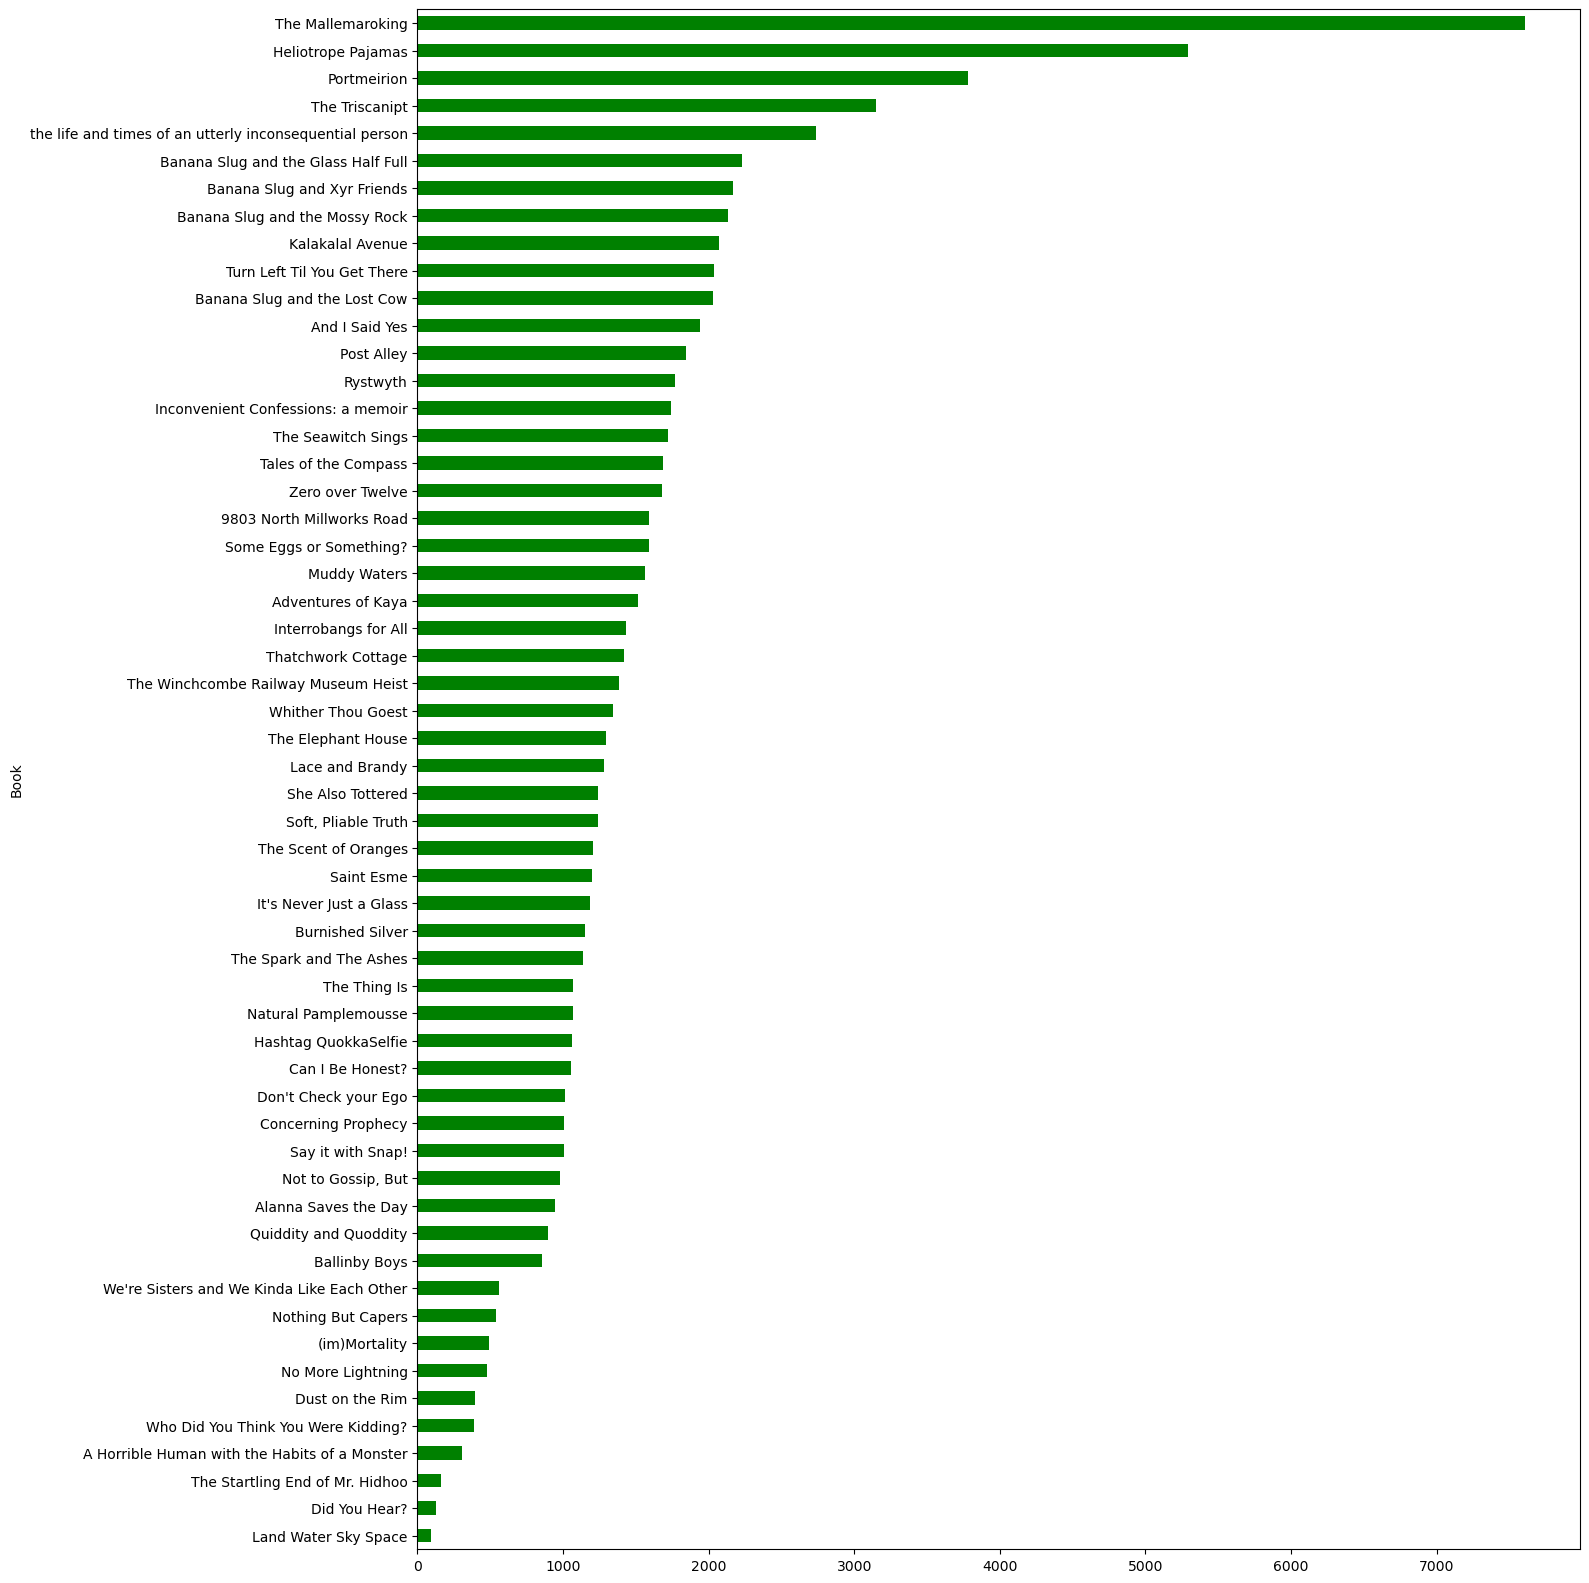

In [ ]:
plt.figure(figsize=(15,20))
df_copy['Book'].value_counts(ascending=True).plot(kind='barh',color='green')

<Axes: ylabel='Award Name'>

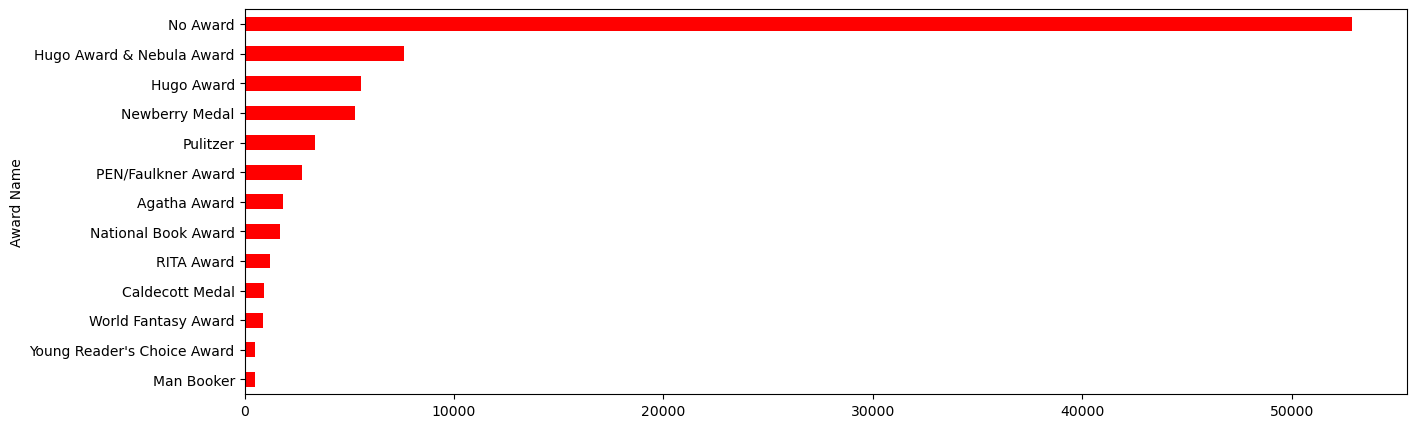

In [ ]:
plt.figure(figsize=(15,5))
df_copy['Award Name'].value_counts(ascending=True).plot(kind='barh',color='red')

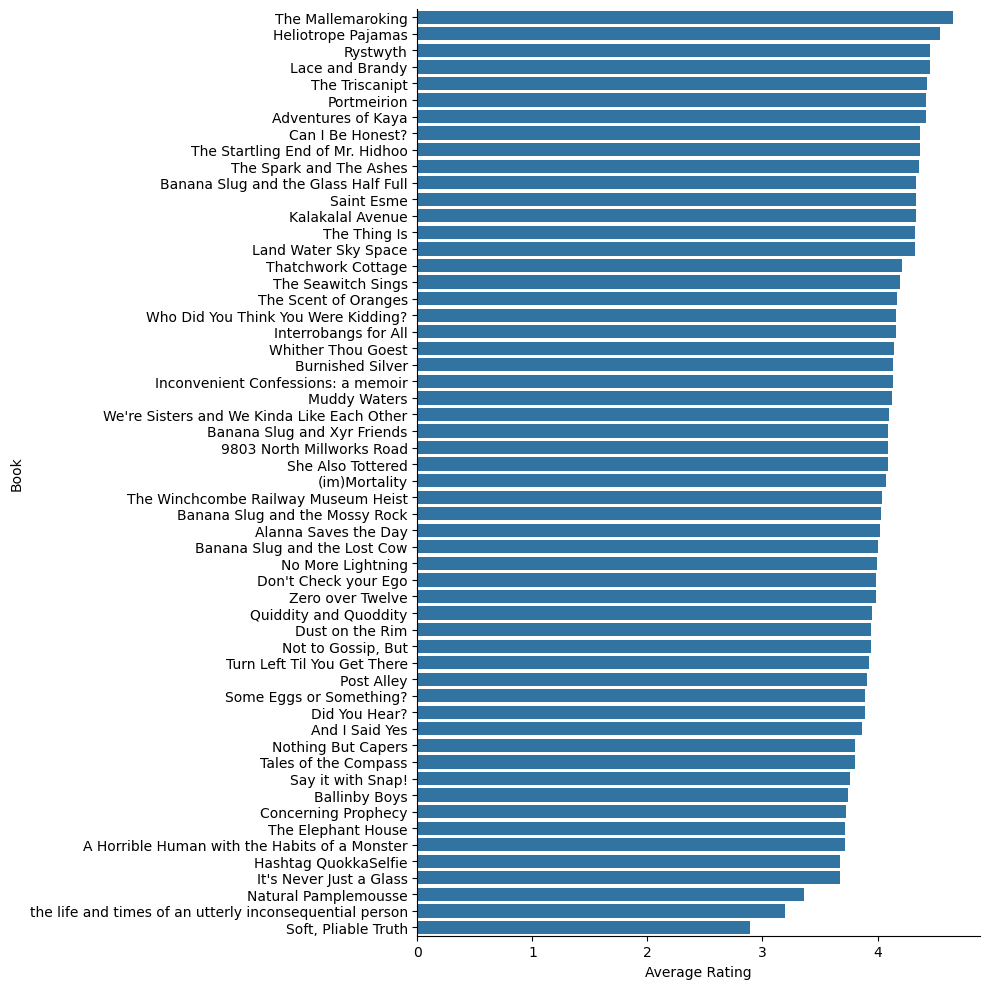

In [ ]:
## books based on average rating
sns.catplot(data=df_copy,x='Average Rating',y='Book',kind='bar',height=10,order=df_copy.sort_values('Average Rating',ascending=False).Book);

<Axes: ylabel='Author'>

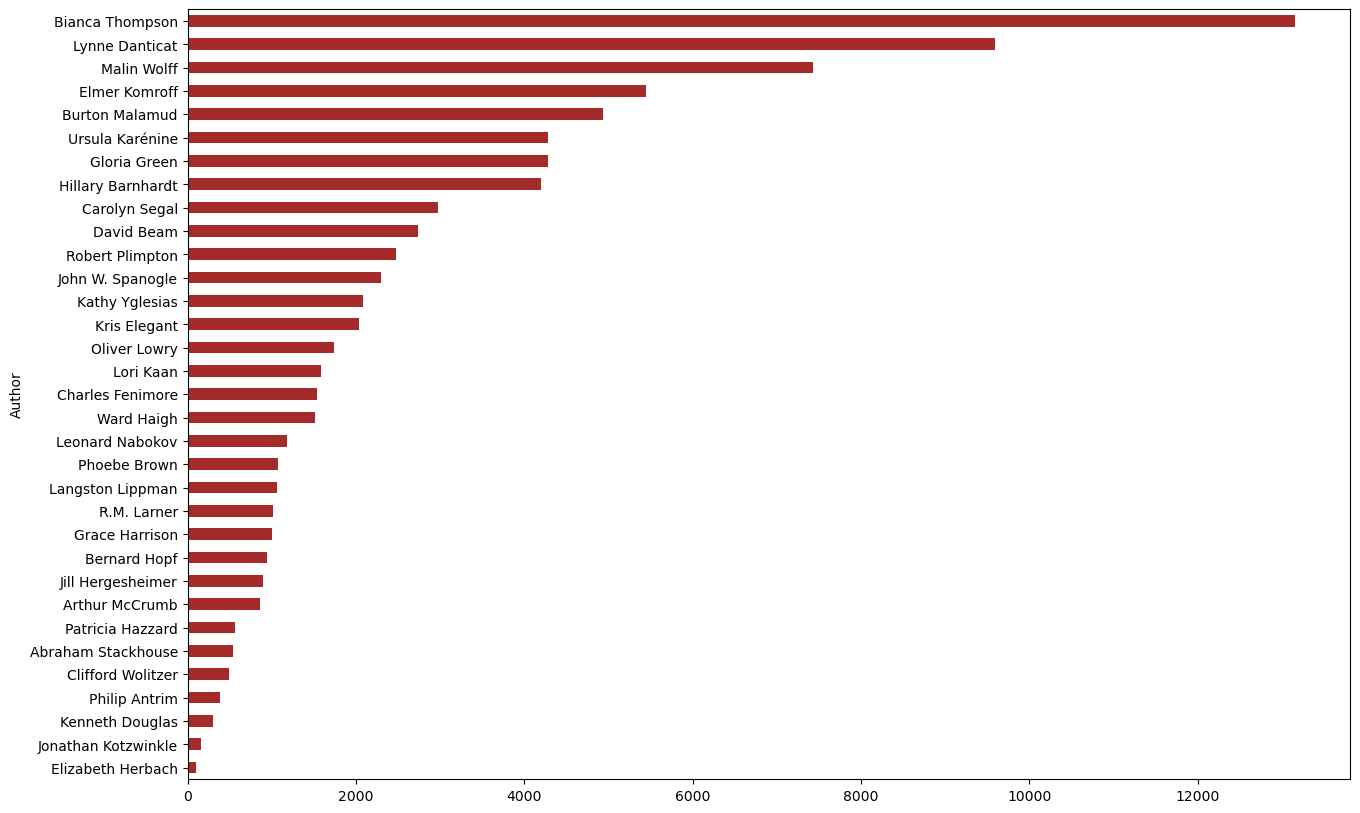

In [ ]:
## popular authors
plt.figure(figsize=(15,10))
df_copy['Author'].value_counts(ascending=True).plot(kind='barh',color='brown')

<Axes: ylabel='Genre'>

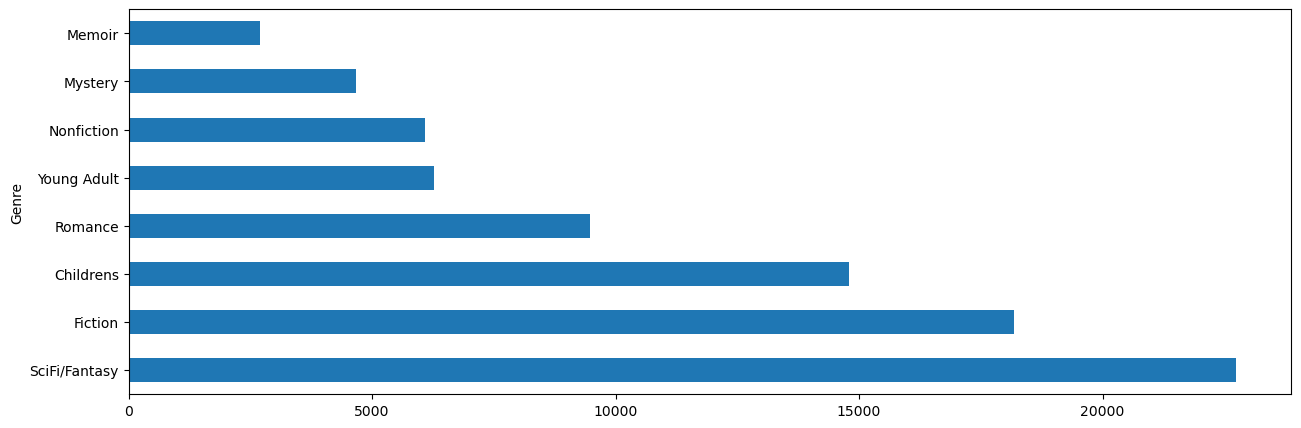

In [ ]:
## genre
plt.figure(figsize=(15,5))
df_copy['Genre'].value_counts().plot(kind='barh')

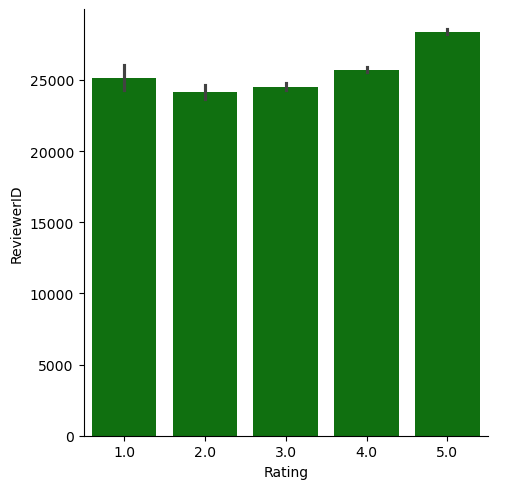

In [ ]:
## Most number of ratings
sns.catplot(data=df_copy,x='Rating',y='ReviewerID',kind='bar',color='green');

## Item based Similarity

In [ ]:
## create a pivot table for book title, reviewer and ratings
df_new=df_copy.pivot_table(index='Book',columns='ReviewerID',values='Rating')
df_new

ReviewerID,3.0,4.0,7.0,8.0,9.0,11.0,12.0,14.0,15.0,17.0,...,53410.0,53411.0,53412.0,53416.0,53417.0,53418.0,53420.0,53421.0,53422.0,53424.0
Book,,,,,,,,,,,,,,,,,,,,,
(im)Mortality,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9803 North Millworks Road,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Horrible Human with the Habits of a Monster,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adventures of Kaya,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alanna Saves the Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
And I Said Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ballinby Boys,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banana Slug and Xyr Friends,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Banana Slug and the Glass Half Full,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [ ]:
df_new.fillna(0,inplace=True)

In [ ]:
## we will use cosine similarity to build recommendation system

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity_scores=cosine_similarity(df_new)
similarity_scores.shape

(56, 56)

In [ ]:
similarity_scores

array([[1.        , 0.00414566, 0.        , ..., 0.00421347, 0.00361276,
        0.00766264],
       [0.00414566, 1.        , 0.00608296, ..., 0.05379968, 0.00619663,
        0.0149055 ],
       [0.        , 0.00608296, 1.        , ..., 0.00716806, 0.01804872,
        0.00475913],
       ...,
       [0.00421347, 0.05379968, 0.00716806, ..., 1.        , 0.00725166,
        0.00731059],
       [0.00361276, 0.00619663, 0.01804872, ..., 0.00725166, 1.        ,
        0.01778738],
       [0.00766264, 0.0149055 , 0.00475913, ..., 0.00731059, 0.01778738,
        1.        ]])

In [ ]:
## define a function to recommend books

In [ ]:
def recommend(book_name):
    # fetch the index of the book from the pivot table
    index=np.where(df_new.index==book_name)[0][0]
    # getting similar suggestions with greater similarity score,
    similar_items=sorted(list(enumerate(similarity_scores[index])), # enumerate to get the distance with index
                         key=lambda x:x[1],  # key=lambda x:x[1] is used to sort the list of based on the similarity score, not on the basis of index
                         reverse=True)[1:6]  # 1:6 will get the books excluding that book as the similarity score of a book with itself is highest

    data=[]
    for i in similar_items:
        item=[]
        temp_df=df[df['Book']==df_new.index[i[0]]] # df_new.index[i[0]]] to get the index of the books
        item.extend(list(temp_df.drop_duplicates('Book')['Book'].values))
        item.extend(list(temp_df.drop_duplicates('Book')['Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book')['Genre'].values))
        item.extend(list(temp_df.drop_duplicates('Book')['Award Name'].values))

        data.append(item)
    return pd.DataFrame(data,columns=['Book','Author','Genre','Award Name'])

In [ ]:
recommend('Adventures of Kaya')

,Book,Author,Genre,Award Name
0,Whither Thou Goest,Lynne Danticat,Romance,No Award
1,Kalakalal Avenue,Elmer Komroff,Fiction,No Award
2,Hashtag QuokkaSelfie,Langston Lippman,Nonfiction,Pulitzer
3,Heliotrope Pajamas,Malin Wolff,Childrens,Newberry Medal
4,The Mallemaroking,Bianca Thompson,SciFi/Fantasy,Hugo Award & Nebula Award


## Reviewer based Similarity

In [ ]:
## create a pivot table for reviewer, book title, and ratings
df_new1=df_copy.pivot_table(index='ReviewerID',columns='Book',values='Rating')
df_new1.fillna(0,inplace=True)
df_new1

Book,(im)Mortality,9803 North Millworks Road,A Horrible Human with the Habits of a Monster,Adventures of Kaya,Alanna Saves the Day,And I Said Yes,Ballinby Boys,Banana Slug and Xyr Friends,Banana Slug and the Glass Half Full,Banana Slug and the Lost Cow,...,The Startling End of Mr. Hidhoo,The Thing Is,The Triscanipt,The Winchcombe Railway Museum Heist,Turn Left Til You Get There,We're Sisters and We Kinda Like Each Other,Whither Thou Goest,Who Did You Think You Were Kidding?,Zero over Twelve,the life and times of an utterly inconsequential person
ReviewerID,,,,,,,,,,,,,,,,,,,,,
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53418.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53420.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
53421.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
similarity_scores1=cosine_similarity(df_new1)
np.fill_diagonal(similarity_scores1,0)
similarity_scores1.shape

(31002, 31002)

In [ ]:
df_new2=pd.DataFrame(similarity_scores1)
df_new2.index=df_copy.ReviewerID.unique()
df_new2.columns=df_copy.ReviewerID.unique()
df_new2

,35.0,75.0,130.0,166.0,203.0,245.0,259.0,371.0,378.0,509.0,...,46303.0,47881.0,47894.0,48818.0,49373.0,49566.0,49854.0,50115.0,50564.0,53225.0
35.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
130.0,0.0,0.0,0.000000,0.0,0.565685,0.0,0.0,0.390434,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.424264
166.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.558744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
203.0,0.0,0.0,0.565685,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49566.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
49854.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50115.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50564.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.707107,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [ ]:
df_new2.idxmax()

35.0         526.0
75.0        5564.0
130.0      45908.0
166.0      32536.0
203.0       1169.0
            ...   
49566.0    39584.0
49854.0     5331.0
50115.0     1966.0
50564.0    42330.0
53225.0     5521.0
Length: 31002, dtype: float64

In [ ]:
## this means that ReviewerID 35 has highest similarity with ReviewerID 526

In [ ]:
## Let's check the books related to 35 and 526
df_copy[(df_copy.ReviewerID==35)|(df_copy.ReviewerID==526)]

,Book,Author,Genre,Award Name,Checkouts,ISBN,Pages,Price,Publishing House,Rating,ReviewerID,Average Rating,Discount
0,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,2.0,35.0,4.166113,12.09
10,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,4.0,526.0,4.166113,12.09
1205,The Seawitch Sings,Lynne Danticat,Romance,No Award,428.0,989-28-229-1404-4,381.0,9.5,Sound & Seas Co.,3.0,35.0,4.196044,8.06


In [ ]:
df_copy[df_copy.ReviewerID==35]

,Book,Author,Genre,Award Name,Checkouts,ISBN,Pages,Price,Publishing House,Rating,ReviewerID,Average Rating,Discount
0,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,2.0,35.0,4.166113,12.09
1205,The Seawitch Sings,Lynne Danticat,Romance,No Award,428.0,989-28-229-1404-4,381.0,9.5,Sound & Seas Co.,3.0,35.0,4.196044,8.06


In [ ]:
df_copy[df_copy.ReviewerID==526]

,Book,Author,Genre,Award Name,Checkouts,ISBN,Pages,Price,Publishing House,Rating,ReviewerID,Average Rating,Discount
10,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,4.0,526.0,4.166113,12.09


In [ ]:
## Reviewer 526 has not read 'The Seawitch Sings' which Reviewer 35 has hence we can recommend this book to Reviewer 526

## Deployment

In [ ]:
# dump the files using pickle

In [ ]:
import pickle

In [ ]:
pickle.dump(df_new,open('df_new.pkl','wb'))  # Save pivot table
pickle.dump(df,open('df.pkl','wb'))  # Save books dataset
pickle.dump(similarity_scores,open('similarity_scores.pkl','wb'))  # Save similarity scores

## Additional features

In [ ]:
## most popular books by ratings

In [ ]:
df.head()

,Book,Author,Genre,Award Name,Checkouts,ISBN,Pages,Price,Publishing House,Rating,ReviewerID,Average Rating,Discount
0,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,2.0,35.0,4.166113,12.09
1,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,3.0,75.0,4.166113,12.09
2,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,5.0,130.0,4.166113,12.09
3,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,4.0,166.0,4.166113,12.09
4,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,989-28-229-0197-6,255.0,9.5,Sound & Seas Co.,3.0,203.0,4.166113,12.09


In [ ]:
df1=df.drop(['Checkouts','ISBN','Pages','Price','Publishing House','Rating','ReviewerID'],axis=1)

In [ ]:
df1.drop_duplicates(subset=['Book'],inplace=True)
df1.reset_index(inplace=True)

In [ ]:
df1.shape

(56, 7)

In [ ]:
df1.drop('index',axis=1,inplace=True)
df1

,Book,Author,Genre,Award Name,Average Rating,Discount
0,The Scent of Oranges,Lynne Danticat,Romance,No Award,4.166113,12.09
1,The Seawitch Sings,Lynne Danticat,Romance,No Award,4.196044,8.06
2,Saint Esme,Lynne Danticat,Romance,RITA Award,4.337229,13.16
3,Lace and Brandy,Lynne Danticat,Romance,No Award,4.453271,25.25
4,Whither Thou Goest,Lynne Danticat,Romance,No Award,4.144131,20.29
5,Muddy Waters,Lynne Danticat,Romance,No Award,4.126598,2.41
6,Burnished Silver,Lynne Danticat,Romance,No Award,4.138261,2.28
7,Heliotrope Pajamas,Malin Wolff,Childrens,Newberry Medal,4.543651,5.85
8,Banana Slug and the Mossy Rock,Malin Wolff,Childrens,No Award,4.030899,0.52
9,Banana Slug and Xyr Friends,Hillary Barnhardt,Childrens,No Award,4.094183,0.13


In [ ]:
df1_new=df1.sort_values('Average Rating',ascending=False).head(10)
df1_new['index']=range(1,11)
df1_new1=df1_new.set_index('index')
df1_new1.drop('Discount',axis=1,inplace=True)
df1_new1

,Book,Author,Genre,Award Name,Average Rating
index,,,,,
1,The Mallemaroking,Bianca Thompson,SciFi/Fantasy,Hugo Award & Nebula Award,4.659653
2,Heliotrope Pajamas,Malin Wolff,Childrens,Newberry Medal,4.543651
3,Rystwyth,Bianca Thompson,SciFi/Fantasy,Hugo Award,4.460407
4,Lace and Brandy,Lynne Danticat,Romance,No Award,4.453271
5,The Triscanipt,Ursula Karénine,SciFi/Fantasy,No Award,4.430838
6,Portmeirion,Bianca Thompson,SciFi/Fantasy,Hugo Award,4.423810
7,Adventures of Kaya,Ward Haigh,Young Adult,No Award,4.421885
8,Can I Be Honest?,Charles Fenimore,Young Adult,No Award,4.372401
9,The Startling End of Mr. Hidhoo,Jonathan Kotzwinkle,Fiction,No Award,4.370370


In [ ]:
pickle.dump(df1_new1,open('df1_new1.pkl','wb'))

In [ ]:
## top 10 books by maximum discount

In [ ]:
df2_new=df1.sort_values('Discount',ascending=False).head(10)
df2_new['index']=range(1,11)
df2_new1=df2_new.set_index('index')
df2_new1.drop('Average Rating',axis=1,inplace=True)
df2_new1

,Book,Author,Genre,Award Name,Discount
index,,,,,
1,Ballinby Boys,Arthur McCrumb,SciFi/Fantasy,World Fantasy Award,76.75
2,Hashtag QuokkaSelfie,Langston Lippman,Nonfiction,Pulitzer,26.55
3,Lace and Brandy,Lynne Danticat,Romance,No Award,25.25
4,Whither Thou Goest,Lynne Danticat,Romance,No Award,20.29
5,9803 North Millworks Road,Carolyn Segal,Mystery,No Award,14.57
6,Saint Esme,Lynne Danticat,Romance,RITA Award,13.16
7,The Scent of Oranges,Lynne Danticat,Romance,No Award,12.09
8,Some Eggs or Something?,Lori Kaan,Fiction,No Award,9.54
9,The Seawitch Sings,Lynne Danticat,Romance,No Award,8.06


In [ ]:
pickle.dump(df2_new1,open('df2_new1.pkl','wb'))

In [ ]:
df3=df.drop(['Average Rating','ISBN','Pages','Discount','Publishing House','Rating','ReviewerID'],axis=1)

In [ ]:
df3.drop_duplicates(subset=['Book'],inplace=True)
df3.reset_index(inplace=True)

In [ ]:
df3.drop('index',axis=1,inplace=True)

In [ ]:
df3.shape

(56, 6)

In [ ]:
df3.head()

,Book,Author,Genre,Award Name,Checkouts,Price
0,The Scent of Oranges,Lynne Danticat,Romance,No Award,161.0,9.5
1,The Seawitch Sings,Lynne Danticat,Romance,No Award,428.0,9.5
2,Saint Esme,Lynne Danticat,Romance,RITA Award,393.0,9.5
3,Lace and Brandy,Lynne Danticat,Romance,No Award,207.0,9.5
4,Whither Thou Goest,Lynne Danticat,Romance,No Award,510.0,9.5


In [ ]:
## top 10 books by least price

In [ ]:
df3_new=df3.sort_values('Price',ascending=True).head(10)
df3_new['index']=range(1,11)
df3_new1=df3_new.set_index('index')
df3_new1.drop('Checkouts',axis=1,inplace=True)
df3_new1

,Book,Author,Genre,Award Name,Price
index,,,,,
1,Heliotrope Pajamas,Malin Wolff,Childrens,Newberry Medal,5.99
2,Banana Slug and the Lost Cow,Hillary Barnhardt,Childrens,No Award,6.99
3,Banana Slug and Xyr Friends,Hillary Barnhardt,Childrens,No Award,6.99
4,Banana Slug and the Mossy Rock,Malin Wolff,Childrens,No Award,7.99
5,Banana Slug and the Glass Half Full,Gloria Green,Childrens,No Award,7.99
6,Tales of the Compass,Kathy Yglesias,SciFi/Fantasy,No Award,8.99
7,Dust on the Rim,Kathy Yglesias,SciFi/Fantasy,No Award,8.99
8,Did You Hear?,Lynne Danticat,Fiction,No Award,8.99
9,Alanna Saves the Day,Bernard Hopf,Childrens,Caldecott Medal,8.99


In [ ]:
pickle.dump(df3_new1,open('df3_new1.pkl','wb'))

In [ ]:
## top 10 books by maximum checkouts

In [ ]:
df4_new=df3.sort_values('Checkouts',ascending=False).head(10)
df4_new['index']=range(1,11)
df4_new1=df4_new.set_index('index')
df4_new1.drop('Price',axis=1,inplace=True)
df4_new1

,Book,Author,Genre,Award Name,Checkouts
index,,,,,
1,Rystwyth,Bianca Thompson,SciFi/Fantasy,Hugo Award,1332.0
2,The Mallemaroking,Bianca Thompson,SciFi/Fantasy,Hugo Award & Nebula Award,1243.0
3,Heliotrope Pajamas,Malin Wolff,Childrens,Newberry Medal,909.0
4,Zero over Twelve,Burton Malamud,Mystery,No Award,576.0
5,Muddy Waters,Lynne Danticat,Romance,No Award,572.0
6,Portmeirion,Bianca Thompson,SciFi/Fantasy,Hugo Award,547.0
7,Whither Thou Goest,Lynne Danticat,Romance,No Award,510.0
8,9803 North Millworks Road,Carolyn Segal,Mystery,No Award,469.0
9,Adventures of Kaya,Ward Haigh,Young Adult,No Award,464.0


In [ ]:
pickle.dump(df4_new1,open('df4_new1.pkl','wb'))